In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv('Smartphones.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [33]:
df.shape

(980, 26)

In [34]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [37]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [38]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [39]:
df.shape

(980, 26)

In [40]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64

In [41]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,78.437755,7.773469,2.421765,4819.793878,0.854082,43.300000,6.560204,141.036735,6.536765,92.256122,2.814286,1.029592,50.319286,16.586122,0.630612,877.093878,1075.852041,2214.663265
std,39531.812669,7.030591,0.834466,0.454757,1004.036245,0.353205,30.836247,2.744378,107.134516,0.349162,28.988052,0.776441,0.169545,33.000968,10.849073,0.482885,298.917207,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,75.000000,8.000000,2.050000,4500.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,1024.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


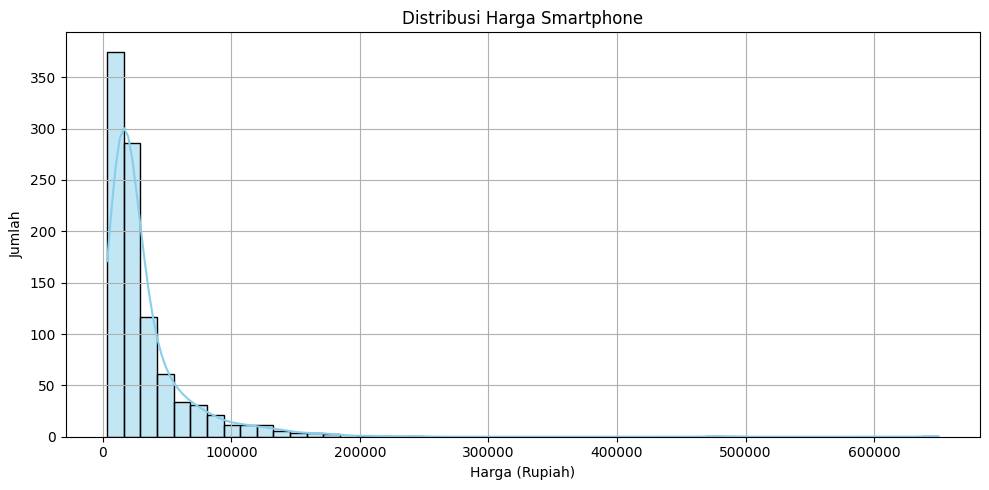

In [42]:
# Plot distribusi harga
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Smartphone')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Jumlah')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\hadid\AppData\Local\Temp\ipykernel_7396\1590888090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ram_capacity', y='price', data=df, palette='Set2')


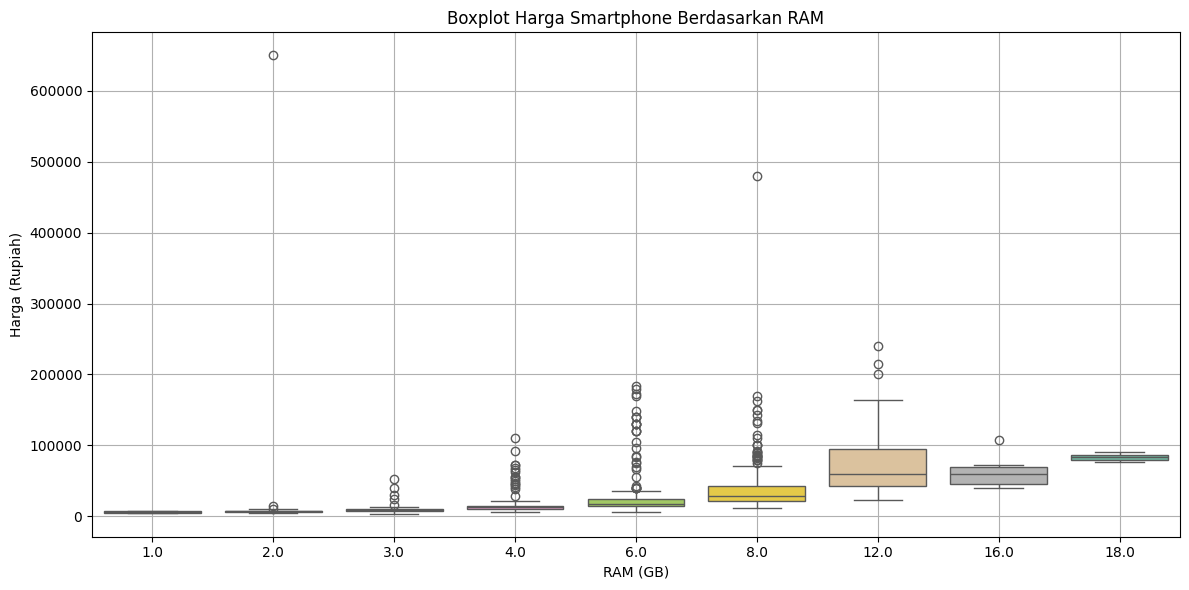

In [43]:
# Plot boxplot harga berdasarkan RAM
plt.figure(figsize=(12, 6))
sns.boxplot(x='ram_capacity', y='price', data=df, palette='Set2')
plt.title('Boxplot Harga Smartphone Berdasarkan RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Harga (Rupiah)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
data = df.copy().drop(columns=['model'])

In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(data[col].median())

In [46]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [47]:
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

In [48]:
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].astype(int)

In [49]:
X = data.drop(columns=['price'])
y = data['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [53]:
y_pred = model.predict(X_test[:5])
y_actual = y_test.iloc[:5].values

In [59]:
from sklearn.metrics import r2_score

In [62]:
r2 = r2_score(y_actual, y_pred)
print("Akurasi R^2 :")
print(r2)

Akurasi R^2 :
0.9856293491943457


In [54]:
result = pd.DataFrame({
    "Prediksi Harga": y_pred,
    "Harga Asli": y_actual
})
print(result)

   Prediksi Harga  Harga Asli
0       106751.62    104999.0
1        16269.06     15999.0
2        27408.07     28999.0
3        11185.24     12500.0
4        52113.89     60999.0


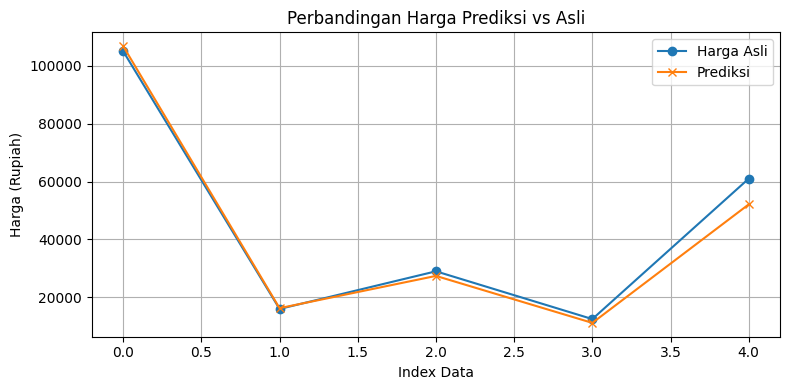

In [55]:
plt.figure(figsize=(8, 4))
plt.plot(y_actual, label="Harga Asli", marker='o')
plt.plot(y_pred, label="Prediksi", marker='x')
plt.title("Perbandingan Harga Prediksi vs Asli")
plt.xlabel("Index Data")
plt.ylabel("Harga (Rupiah)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
